In [ ]:
import pandas as pd
import os

# Ruta a la carpeta donde se encuentra el dataset vindr en el disco externo
ruta_vindr = '/Volumes/m2/Memoria/Datasets/vindr'

# Leer archivos CSV
breast_level_annotations = pd.read_csv(os.path.join(ruta_vindr, 'breast-level_annotations.csv'))
finding_annotations = pd.read_csv(os.path.join(ruta_vindr, 'finding_annotations.csv'))
metadata = pd.read_csv(os.path.join(ruta_vindr, 'metadata.csv'))

# Mostrar las primeras filas de cada CSV
print("Breast Level Annotations:")
print(breast_level_annotations.head())

print("\nFinding Annotations:")
print(finding_annotations.head())

print("\nMetadata:")
print(metadata.head())

# Si necesitas trabajar con las imágenes
ruta_imagenes = os.path.join(ruta_vindr, 'images')
lista_imagenes = os.listdir(ruta_imagenes)

print(f"\nNúmero de imágenes en la carpeta 'images': {len(lista_imagenes)}")
print(f"Ejemplo de nombres de imágenes: {lista_imagenes[:5]}")


## Análisis exploratorio

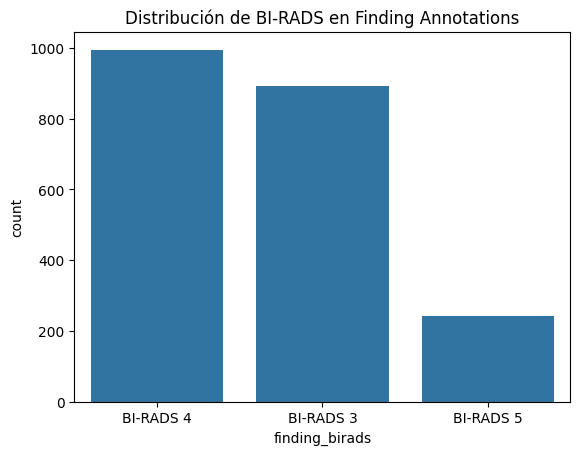

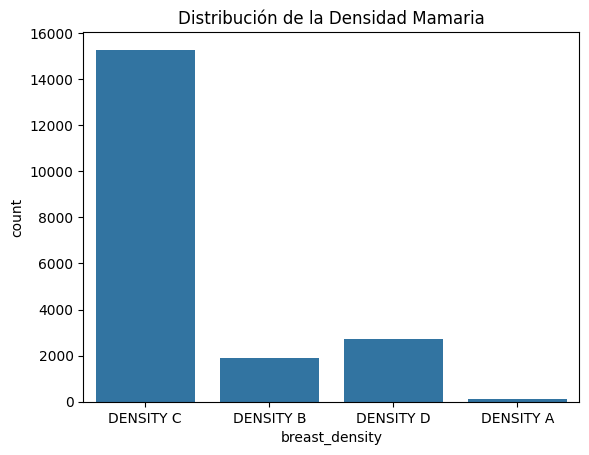

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de categorías BI-RADS en Finding Annotations
sns.countplot(data=finding_annotations, x='finding_birads')
plt.title('Distribución de BI-RADS en Finding Annotations')
plt.show()

# Distribución de densidad mamaria
sns.countplot(data=breast_level_annotations, x='breast_density')
plt.title('Distribución de la Densidad Mamaria')
plt.show()


## Visualización de Imágenes:

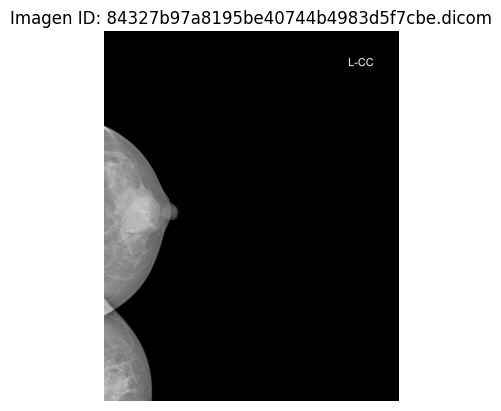

In [27]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import os
import random

# Ruta a la carpeta donde se encuentran las subcarpetas de imágenes DICOM
ruta_imagenes = '/Volumes/m2/Memoria/Datasets/vindr/images'

# Cargar el archivo metadata.csv
ruta_metadata = '/Volumes/m2/Memoria/Datasets/vindr/metadata.csv'
metadata = pd.read_csv(ruta_metadata)

# Seleccionar un ID de imagen aleatoriamente
random_image_id = random.choice(metadata['SOP Instance UID']) + '.dicom'

# Buscar el archivo dentro de las subcarpetas
found_image_path = None
for root, dirs, files in os.walk(ruta_imagenes):
    if random_image_id in files:
        found_image_path = os.path.join(root, random_image_id)
        break

if found_image_path:
    # Cargar la imagen DICOM
    dicom_image = pydicom.dcmread(found_image_path)

    # Visualizar la imagen
    plt.imshow(dicom_image.pixel_array, cmap=plt.cm.gray)
    plt.title(f"Imagen ID: {random_image_id}")
    plt.axis('off')
    plt.show()
else:
    print(f"El archivo {random_image_id} no se encontró en ninguna subcarpeta.")


In [ ]:
import pandas as pd
import os

# Ruta a la carpeta donde se encuentran las subcarpetas de imágenes DICOM
ruta_imagenes = '/Volumes/m2/Memoria/Datasets/vindr/images'

# Cargar los archivos CSV
ruta_breast_annotations = '/Volumes/m2/Memoria/Datasets/vindr/breast-level_annotations.csv'
ruta_finding_annotations = '/Volumes/m2/Memoria/Datasets/vindr/finding_annotations.csv'
ruta_metadata = '/Volumes/m2/Memoria/Datasets/vindr/metadata.csv'

breast_annotations = pd.read_csv(ruta_breast_annotations)
finding_annotations = pd.read_csv(ruta_finding_annotations)
metadata = pd.read_csv(ruta_metadata)

# Contar el número de imágenes en la carpeta 'images'
imagenes_totales = 0
for root, dirs, files in os.walk(ruta_imagenes):
    imagenes_totales += len(files)

print(f"Número total de imágenes en la carpeta 'images': {imagenes_totales}")

# Contar el número de imágenes únicas en los archivos CSV
imagenes_breast = breast_annotations['image_id'].nunique()
imagenes_finding = finding_annotations['image_id'].nunique()
imagenes_metadata = metadata['SOP Instance UID'].nunique()

print(f"Número total de imágenes únicas en breast_level_annotations: {imagenes_breast}")
print(f"Número total de imágenes únicas en finding_annotations: {imagenes_finding}")
print(f"Número total de imágenes únicas en metadata: {imagenes_metadata}")

# Análisis de categorías (por ejemplo, densidad mamaria, posición de vista, etc.)
print("\nDistribución de la densidad mamaria en breast_level_annotations:")
print(breast_annotations['breast_density'].value_counts())

print("\nDistribución de la posición de vista en breast_level_annotations:")
print(breast_annotations['view_position'].value_counts())

# Verificar si todas las imágenes mencionadas en los archivos CSV están presentes en la carpeta de imágenes
imagenes_no_encontradas = []
for image_id in metadata['SOP Instance UID']:
    image_filename = image_id + '.dicom'
    found = False
    for root, dirs, files in os.walk(ruta_imagenes):
        if image_filename in files:
            found = True
            break
    if not found:
        imagenes_no_encontradas.append(image_filename)

print(f"\nNúmero de imágenes mencionadas en metadata pero no encontradas en la carpeta 'images': {len(imagenes_no_encontradas)}")
if imagenes_no_encontradas:
    print("Ejemplos de imágenes no encontradas:")
    print(imagenes_no_encontradas[:5])


Número total de imágenes en la carpeta 'images': 20001
Número total de imágenes únicas en breast_level_annotations: 20000
Número total de imágenes únicas en finding_annotations: 20000
Número total de imágenes únicas en metadata: 20000

Distribución de la densidad mamaria en breast_level_annotations:
breast_density
DENSITY C    15292
DENSITY D     2700
DENSITY B     1908
DENSITY A      100
Name: count, dtype: int64

Distribución de la posición de vista en breast_level_annotations:
view_position
CC     10001
MLO     9999
Name: count, dtype: int64
